# Solve Poisson Equation using Finite Differences

In [37]:
import numpy as np
import pandas as pd
from plotnine import *
import scipy.sparse
import scipy.sparse.linalg
import matplotlib.pylab as plt

## Create Finite Differences Matrix

In [38]:
N = 100
r = np.ones(N, dtype=float)
A = scipy.sparse.spdiags([r, -2*r, r], [-1, 0, 1], N, N, format='csc')

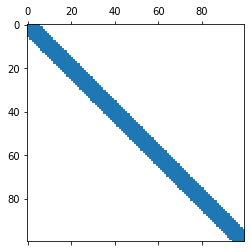

In [39]:
plt.spy(A)
plt.show()

# Q2 Solve Poisson Problem

In [40]:
L = 2 * np.pi
x = np.linspace(0, L, N+2)
dx = x[1]-x[0]
f_cos = 2*np.cos(x) / np.exp(x)
f_sin = 2*np.sin(x) / np.exp(x)
analytic_cos = -np.sin(x)/np.exp(x)
analytic_sin = np.cos(x)/np.exp(x)

## LU Decomposition on A

In [41]:
LU_A = scipy.sparse.linalg.splu(A/dx**2)

## Solve problems

In [42]:
v_cos = f_cos[1:-1]
fd_cos = np.zeros(x.shape, dtype=float)
fd_cos[1:-1] = LU_A.solve(v_cos)

v_sin = f_sin[1:-1]
v_sin[0] -= 1/dx**2
v_sin[-1] -= 1/(np.exp(L)*dx**2)
fd_sin = np.zeros(x.shape, dtype=float)
fd_sin[1:-1] = LU_A.solve(v_sin)
fd_sin[0] = 1
fd_sin[-1] = 1/(np.exp(L))

## Plot Solutions

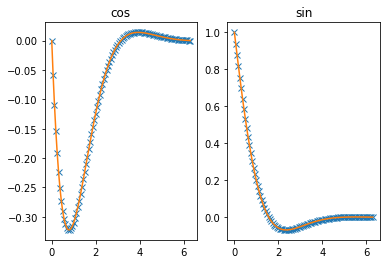

In [43]:
fig, axs = plt.subplots(1, 2)
axs[0].plot(x, fd_cos, 'x', label='finite differences')
axs[0].plot(x, analytic_cos, label='analytic')
axs[0].set_title('cos')

axs[1].plot(x, fd_sin, 'x', label='finite differences')
axs[1].plot(x, analytic_sin, label='analytic')
axs[1].set_title('sin')

plt.show()